Missing values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Missing values after handling:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


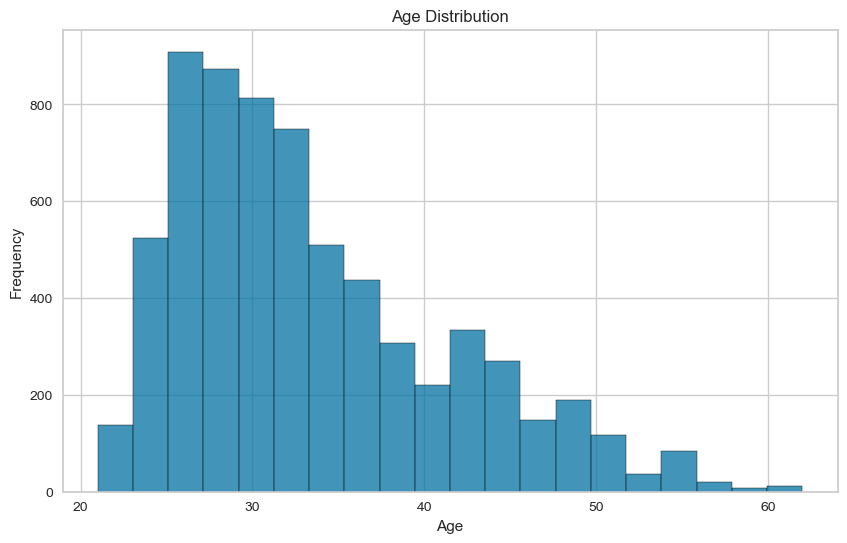

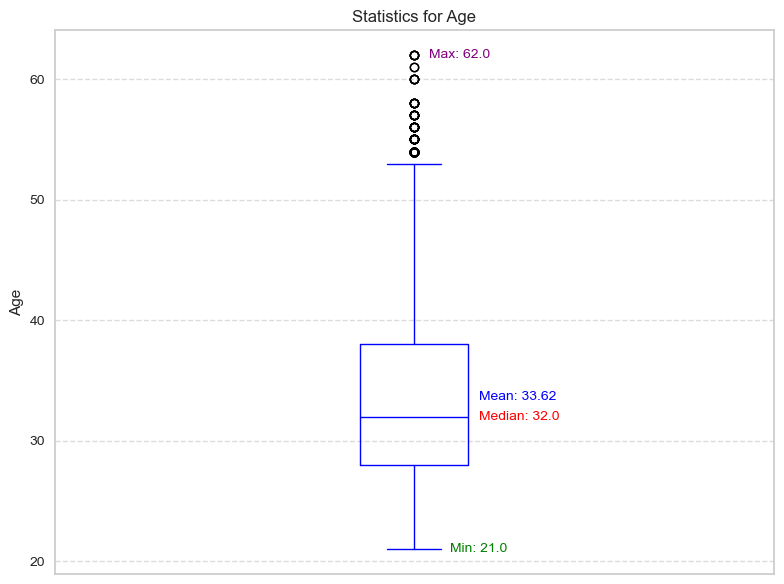

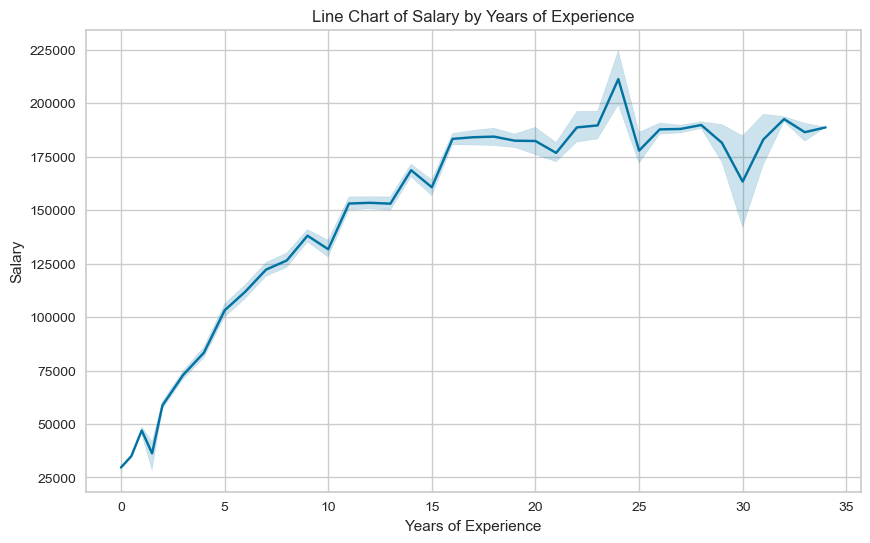

Clusters: [0 0 2 ... 0 1 0]
Centroids: [[3.00123894e+00 6.33145727e+04]
 [8.75576770e+00 1.37417482e+05]
 [1.74621045e+01 1.82593170e+05]]


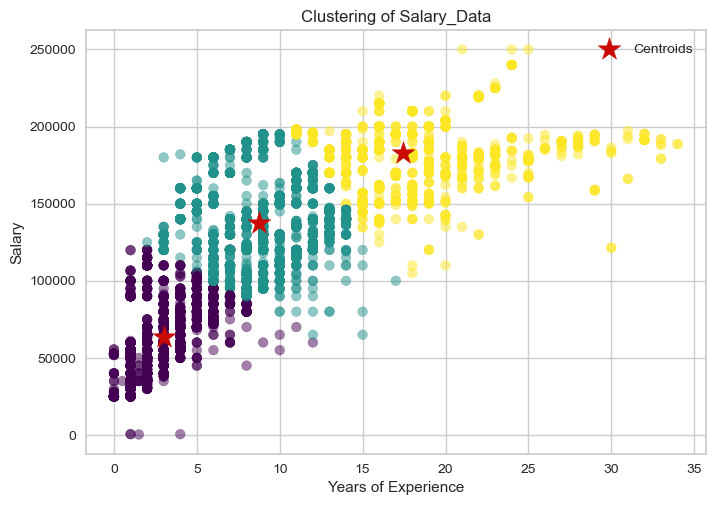

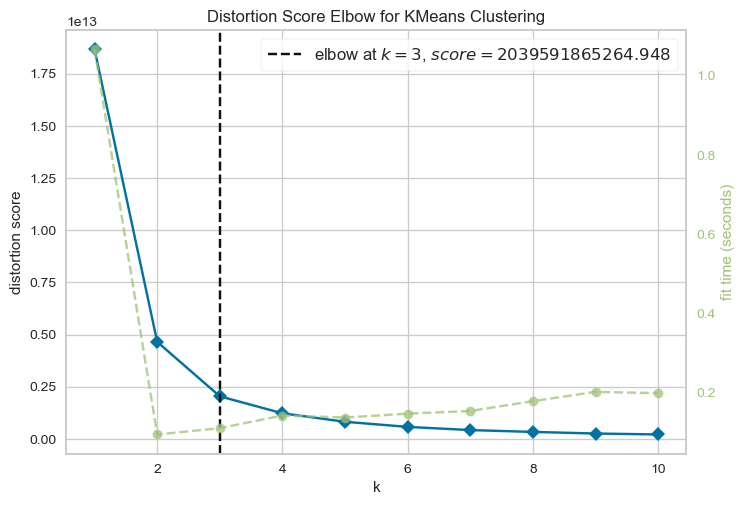

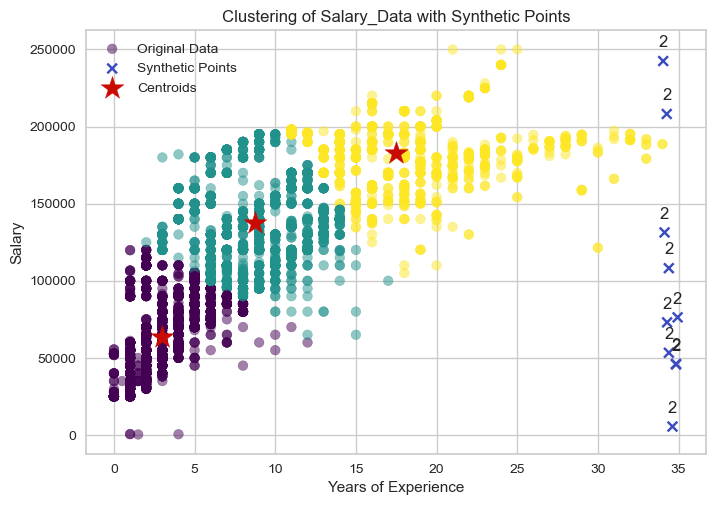

Silhouette Score: 0.4232577800663491
Inertia: 2732.867695553319
Intercept: 58284.685676958106
Coefficient: 7046.734456548318


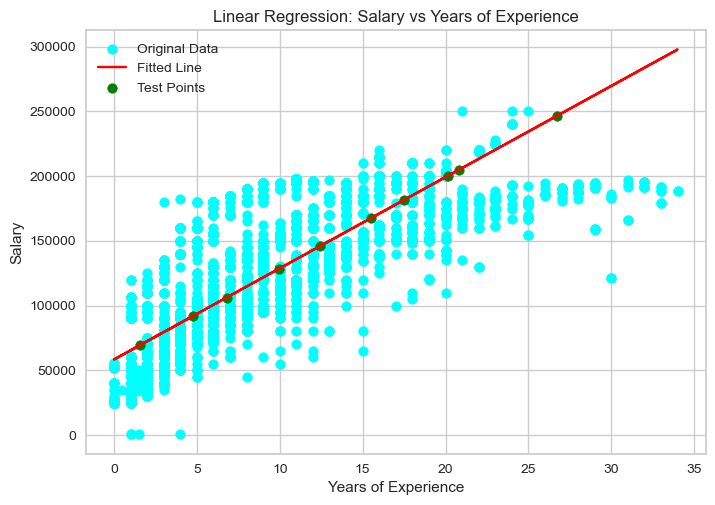

R-squared: 0.6544294992867405
Mean Squared Error (MSE): 962879028.7143886
Root Mean Squared Error (RMSE): 31030.292114551365
Mean Absolute Error (MAE): 24888.839357509525


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

def create_single_plot(data, plot_type):
    
    if plot_type == 'histogram':
        plt.figure(figsize=(10, 6))
        sns.histplot(data['Age'], bins=20)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.savefig('age_distribution_with_grid.png')
        plt.show()
    elif plot_type == 'boxplot':
        age_stats = data['Age'].describe()
        plt.figure(figsize=(8, 6))
        data['Age'].plot(kind='box', color='blue')
        plt.text(1.09, age_stats['mean'], f"Mean: {age_stats['mean']:.2f}", fontsize=10, ha='left', va='center',
                 color='blue')
        plt.text(1.09, age_stats['50%'], f"Median: {age_stats['50%']}", fontsize=10, ha='left', va='center',
                 color='red')
        plt.text(1.05, age_stats['min'], f"Min: {age_stats['min']}", fontsize=10, ha='left', va='center',
                 color='green')
        plt.text(1.02, age_stats['max'], f"Max: {age_stats['max']}", fontsize=10, ha='left', va='center',
                 color='purple')
        plt.title('Statistics for Age')
        plt.ylabel('Age')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks([])
        plt.tight_layout()
        plt.savefig('age_statistics_plot.png')
        plt.show()
    elif plot_type == 'lineplot':
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Years of Experience', y='Salary', data=data)
        plt.title('Line Chart of Salary by Years of Experience')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.savefig('lineplot.png')
        plt.show()


def clustering_analysis(data):
    X = data[['Years of Experience', 'Salary']].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, clusters, centroids, scaler 


# Cleaning the data
data = pd.read_csv('Salary_Data.csv')
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)
data.dropna(inplace=True)
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)

# Plot histogram
create_single_plot(data, 'histogram')

# Calculate summary statistics for Age column
create_single_plot(data, 'boxplot')

# Line chart
create_single_plot(data, 'lineplot')

# Clustering Analysis
kmeans, clusters, centroids, scaler = clustering_analysis(data) 
print("Clusters:", clusters)
print("Centroids:", centroids)

# Clustering Visualization
plt.scatter(data['Years of Experience'], data['Salary'], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='Centroids')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Clustering of Salary_Data')
plt.grid(True)
plt.legend()
plt.savefig('clustering visualization.png')
plt.show()

# Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(data[['Years of Experience', 'Salary']])
plt.savefig('elbow.png')
visualizer.show()

# Synthetic Data Points
np.random.seed(42)
num_synthetic_points = 10
synthetic_points = np.zeros((num_synthetic_points, 2))
synthetic_points[:, 0] = np.random.uniform(35, data['Years of Experience'].max(), num_synthetic_points)  # Adjusted range
synthetic_points[:, 1] = np.random.uniform(data['Salary'].min(), data['Salary'].max(), num_synthetic_points)
synthetic_clusters = kmeans.predict(scaler.transform(synthetic_points))
plt.scatter(data['Years of Experience'], data['Salary'], c=clusters, cmap='viridis', alpha=0.5, label='Original Data')
plt.scatter(synthetic_points[:, 0], synthetic_points[:, 1], c=synthetic_clusters, cmap='coolwarm', marker='x',
            label='Synthetic Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='Centroids')
for i, txt in enumerate(synthetic_clusters):
    plt.annotate(txt, (synthetic_points[i, 0], synthetic_points[i, 1]), textcoords="offset points", xytext=(0, 10),
                 ha='center')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Clustering of Salary_Data with Synthetic Points')
plt.grid(True)
plt.legend()
plt.savefig('clustering_prediction.png')
plt.show()

# Silhouette Score and Inertia to test the accuracy of clustering
silhouette_avg = silhouette_score(data[['Years of Experience', 'Salary']].values, clusters)
print("Silhouette Score:", silhouette_avg)
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Linear Regression
X = data[['Years of Experience']].values
y = data['Salary'].values
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
y_pred = model.predict(X)
plt.scatter(X, y, color='cyan', label='Original Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
new_X = np.random.uniform(X.min(), X.max(), size=(10, 1))
predictions = model.predict(new_X)
plt.scatter(new_X, predictions, color='green', label='Test Points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.legend()
plt.grid(True)
plt.savefig('fitting_prediction.png')
plt.show()

# Model Evaluation to test the accuracy of fitting prediction
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)
